# What are people tlaking about when they talk about the COVID-19 vaccine?

## Research Question
* What are the public's approval of the COVID-19 vaccine?
    * How do can we measure it?
    * Does it varies with respect to space?
* What roles does social media (Twitter) play in...?
* What are the publics' consern about the vaccine?
    * Does these conserns varies in terms of location?

## Data Sources & Description
As of now, the datasets we will be using is the Pfizer and BioNTech Vaccine Tweets Dataset. The Pfizer and BioNTech Vaccine Tweets Dataset is posted on Kaggle and created by Gabriel Preda, who is a data scientist in Romania. The dataset includes variables such as users’ names, locations, and their original tweets about the vaccines. The link to the datasets is:
  * https://www.kaggle.com/gpreda/pfizer-vaccine-tweets

### Importing Data
Since the Tweets Dataset we will be using is updated daily, besides saving a copy of the older version, we also want to import the most up to date data directly from Kaggle using the provided API. Here are the steps:
* Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens.
* Click on Create New API Token - It will download kaggle.json file on your machine.
* now just put it in the location C:\Users\(your user name)\.kaggle.

In [203]:
# uncomment next line if Kaggle library is not installed on your computer
#!pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
api = KaggleApi()
api.authenticate()
# download a copy of the most up to date data to your computer
api.dataset_download_files('gpreda/pfizer-vaccine-tweets')
# unzip the download file
zf = ZipFile('pfizer-vaccine-tweets.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

### Access the data we just downloaded

In [204]:
import pandas as pd
df_tweets=pd.read_csv('vaccination_tweets.csv')

### Some Basic Checkings
* Number of rows and column variables.
* The name of the column variabes.
* A quick glance of the actual data using the head method.

In [205]:
print(df_tweets.shape)
print(df_tweets.columns)

(5376, 16)
Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


In [206]:
df_tweets.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Since we are interested in the geographical reaationship of the users and want to analyze the tweets' content, some cleaning and engineering needs to be done.

## Data Cleaning & Engineering

### Data Cleaning
We first remove the columns we will not use, such as user ID and user names.

In [207]:
df_tweets.drop(columns=['id','user_description','hashtags'], inplace=True)
print(df_tweets.shape)
df_tweets.head(5)

(5376, 13)


,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",Twitter Web App,446,2129,False
4,Citizen News Channel,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,Twitter for iPhone,0,0,False


### Data Engineering - Users' Location
User locations like 'Your Bed' and NaN clearly won't help with our geographical analysis.
We want to at least extract the city and country from the location description/ 'user_locatiom' column. 

To accomplish this task, we will us a library called **Geotext**.This library allows us to extract **city name** and **country code** without going through the NLP hassle. The geological information will be used for the data exploration process and guide our direction of this research.

Import GeoText and the OrderedDict library, we will use the OrderedDict library to interact with the results returned from GeoText.

In [208]:
# uncomment next line to intall Geotext if you have not yet installed
#!pip install geotext
from geotext import GeoText
# we will need the another tool to interact with Geotext
from collections import OrderedDict 

How GeoText works?

In [209]:
places1 = GeoText("my bed")
print(places1.cities)
places2 = GeoText("London is a great city")
print(places2.cities)
print(places2.country_mentions.keys())
print(list(places2.country_mentions.keys())[0])

[]
['London']
odict_keys(['GB'])
GB


Notice that not all users' location description are useable since GeoText can only read strings. Therefore we want to do some subsetting.

It's okay to have empty string as location description, Geotext will figure it out.

In [210]:
df_tweets['user_location'] = df_tweets['user_location'].astype('string')

Finally, extracting location data. 

Here we use a try block to skip cases with emojis and random characters.

In [211]:
user_city = []
user_country = []
for index, row in df_tweets.iterrows():
    try:
        if GeoText(row['user_location']).cities:
            user_city.append(GeoText(row['user_location']).cities[0])
            user_country.append(list(GeoText(row['user_location']).country_mentions.keys())[0])
        else:
            user_city.append('')
            user_country.append('')
    except:
        user_city.append('')
        user_country.append('')      
# Assign it as new columns
df_tweets['user_city'] = user_city
df_tweets['user_country'] = user_country

### Data Engineering - Geocoding Users' Location
The city names and coutry code is usefull for statistical purposes.But they are not helpful interms of mapping. Therefore we need to geocode (get the longitude and latitude) the cities by their name. To do this, we will use the help of Geopy.

In [212]:
# uncomment next line to intall GeoPy if you have not yet do so
#!pip install geopy
import geopy
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")

How it works:

In [213]:
print(locator.geocode("Los Angeles"))
print(locator.geocode("Los Angeles").latitude)
print(locator.geocode("Los Angeles").longitude)

Los Angeles, Los Angeles County, California, United States
34.0536909
-118.242766


Keep in mind that an IP address will have a limited amount of access to the server. Also, you can make one request per second. Make sure to skip the empty strings to save your resources and time.

In [214]:
%%time
lat = []
lon = []
for index, row in df_tweets.iterrows():
    if row['user_city']:
        lat.append(locator.geocode(row['user_city']).latitude)
        lon.append(locator.geocode(row['user_city']).longitude)
    else:
        lat.append('')
        lon.append('')
df_tweets['city_latitude']=lat
df_tweets['city_longitude']=lon

Wall time: 35min 5s


In [215]:
df_tweets.head(5)

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites,is_retweet,user_city,user_country,city_latitude,city_longitude
0,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,Twitter for Android,0,0,False,Montrose,US,38.437539,-108.240386
1,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Twitter Web App,1,1,False,San Francisco,US,37.779026,-122.419906
2,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Twitter for Android,0,0,False,,,,
3,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",Twitter Web App,446,2129,False,Vancouver,CA,49.260872,-123.113953
4,Citizen News Channel,<NA>,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,Twitter for iPhone,0,0,False,,,,


### Data Engineering - Text Sentiment Analysis & Pre-Natural Language Processing
Besides the spacial relationship, we are also interested in the content that users posted. To measure users' approval of the COVID-19 vaccine, we will approach with the sentiment score of the texts.

The nltk library we will be using returns measures of postivity, negativity, neutrality, and a compound sentiment score of the text. The higher the compound sentiment score, the greater the approval.

We will need to import the NLTK library and download some dictionaries to run certain methods.

In [216]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# load the sentiment function
sia = SentimentIntensityAnalyzer()
# load the stemmer function 
porter = nltk.PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wuyue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wuyue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Wuyue\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


How it works?

In [217]:
sia.polarity_scores('Why did the scarecrow win an award? Because he was outstanding in his field!')

{'neg': 0.077, 'neu': 0.427, 'pos': 0.496, 'compound': 0.8955}

Now we will calculate the centiment score for each tweet, we will also store the words list in each tweet for future content analysis and visualizations.

In [218]:
# set stop words
stop_words = set(stopwords.words('english'))

# create new list for adding new columns
tweet_NPL=[]
neg_sentiment = []
pos_sentiment = []
neu_sentiment = []
compound_sentiment = []


# iterate through all rows and calcukate sentiment scores
for index, row in df_tweets.iterrows():
    
    # we replace the URL to avoid unwanted clicking
    # not doing this will result most sentiment scores become 0, so be carefull
    tweet = row['text'].replace("://", "//")
    # the sentiment score is calculated by one line of code
    # it returns a disctionary, so we need to name the score we want
    neg_sentiment.append(sia.polarity_scores(tweet)['neg'])
    pos_sentiment.append(sia.polarity_scores(tweet)['pos'])
    neu_sentiment.append(sia.polarity_scores(tweet)['neu'])
    compound_sentiment.append(sia.polarity_scores(tweet)['compound'])
    # uncomment the following line, you will see the dictionary
    # sentiment.append(sia.polarity_scores(tweet))
    
    
    # now we need to extract usefull words from the text, it takes some steps
    # we first splits up the sentence into words using the tokenize function
    word_lists = word_tokenize(row['text'])
    # we then turn every word into lower case
    word_lists = [w.lower() for w in word_lists]
    
    # similar to stop words, we create a list of characters we don't want
    unwanted_chars = ['.',':',',',"n't","'ve",'http']
    
    # trim the word list using stop words and unwanted_chars
    trimmed_word_list = [w for w in word_lists if not w in stop_words] 
    trimmed_word_list = [w for w in word_lists if not w in unwanted_chars] 
    # we also filter out the URL
    trimmed_word_list = [w for w in trimmed_word_list if not w[:2]== "//"] 
    
    # Now lets stem the words using the stemmer function we load earlier
    trimmed_word_list  = [porter.stem(w) for w in trimmed_word_list]
    # add it to the list we created
    tweet_NPL.append(trimmed_word_list)

# now we have new column variables for analysis
df_tweets['text_words'] = tweet_NPL
df_tweets['neg_sentiment'] = neg_sentiment
df_tweets['pos_sentiment'] = pos_sentiment
df_tweets['neu_sentiment'] = neu_sentiment
df_tweets['compound_sentiment'] = compound_sentiment

Let's do some simple checking...
The following cell will demonstrate how we processed the tweet.

In [219]:
print (df_tweets['text'][5])
print (df_tweets['text_words'][5])
print (df_tweets['neg_sentiment'][5])
print (df_tweets['pos_sentiment'][5])
print (df_tweets['neu_sentiment'][5])
print (df_tweets['compound_sentiment'][5])

Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN
['doe', 'anyon', 'have', 'ani', 'use', 'advice/guid', 'for', 'whether', 'the', 'covid', 'vaccin', 'is', 'safe', 'whilst', 'breastfeed', '?', '…', 'http']
0.0
0.293
0.707
0.7003


## Data Exploration and Analysis
The data cleaning and enginerring took about 80% of the time spent on this project so far. Now we can finaly start our analysis.

### What roles do social medias play in the spread of COVID-19 related information?

Text(0, 0.5, 'New Users Created')

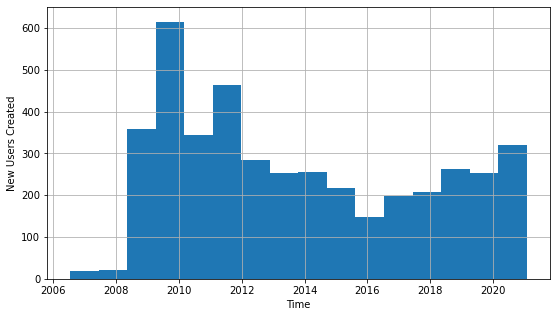

In [220]:
import datetime
import matplotlib as plt
df_tweets['user_created']=pd.to_datetime(tweets_df['user_created'])
ax = df_tweets["user_created"].hist(bins=16,figsize=(9,5))
#ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2021, 2, 10)])
ax.set_ylim([0, 650])
ax.set_xlabel("Time")
ax.set_ylabel("New Users Created")

It seems like there is an increase in user creation after 2020. Let's take a closer look. 

Text(0, 0.5, 'New Users Created')

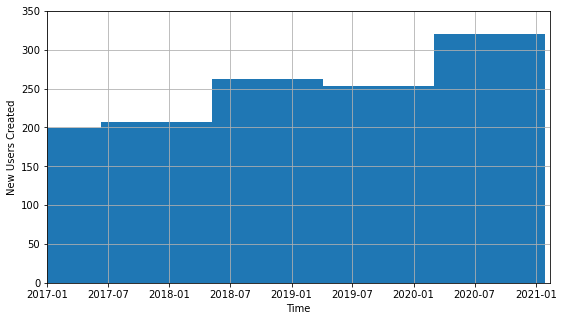

In [221]:
ax = df_tweets["user_created"].hist(bins=16,figsize=(9,5))
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2021, 2, 10)])
ax.set_ylim([0, 350])
ax.set_xlabel("Time")
ax.set_ylabel("New Users Created")

### Analysis
There is an increase in new user number right after the COVID-19 outbreak, we can assume they are related. This shows people use online social media platforms to obtain news and information.

### What cities generated the most discussions about the COVID vaccines?

Let's first check the cities.

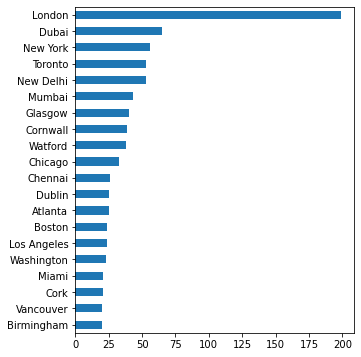

In [222]:
df_cities = df_tweets.query("user_city != ''")
ax = df_cities['user_city'].value_counts(sort=False).nlargest(20).plot(kind='barh',figsize=(5,6))
ax.invert_yaxis()

Do we have users that tweets more frequently than others?

In [223]:
df_users=pd.read_csv('vaccination_tweets.csv')
frequent_tweeters = df_tweets['user_name'].value_counts().head(30).to_frame().reset_index()
frequent_tweeters.columns = ['user_name', 'count']
frequent_tweeters.head(30)

,user_name,count
0,TheRag,49
1,Ian 3.5% #FBPE,37
2,🕷Financial Bear 3.5%,31
3,Whtrslugcaviiersong#dontstayhomeandcatchcovid19,30
4,Simon Hodes ⬅️2m➡️ 😷,30
5,New Straits Times,30
6,Medical Study Blog,29
7,ILKHA,29
8,Khaleej Times,28
9,Dr.Krutika Kuppalli,27


Where are they tweeting from?

In [224]:
cities = []
countries = []
for index, row in df_tweets.iterrows():
    if row['user_name'] in list(frequent_tweeters['user_name']):
        if row['user_city'] and row['user_country']:
            cities.append(row['user_city'])
            countries.append(row['user_country'])
pairs = {'city': cities , 'country': countries}
df = pd.DataFrame(pairs)
df.groupby('country')['city'].value_counts()

country  city     
AE       Dubai        13
CA       Cornwall     37
GB       Watford      30
         Glasgow      20
         Poole        12
IN       Mumbai       13
         New Delhi    12
PH       Asia         11
US       Miami        11
Name: city, dtype: int64

What about the countries?

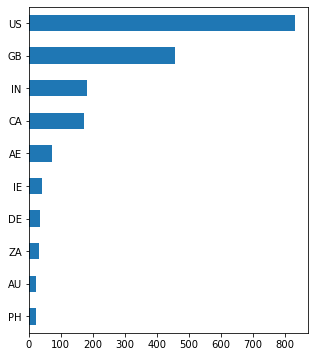

In [225]:
df_countries = df_tweets.query("user_country != ''")
ax = df_countries['user_country'].value_counts(sort=False).nlargest(10).plot(kind='barh',figsize=(5,6))
ax.invert_yaxis()

Notice that the United States has the most users number in the dataset, we want to take a look at what U.S cities care most about vaccine. We also want to see what makes them stand out and possible reasons behind this.

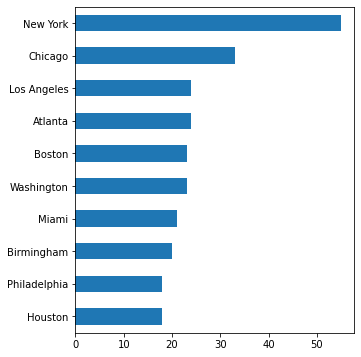

In [226]:
df_UStweets = df_tweets.query("user_country == 'US'")
ax = df_UStweets['user_city'].value_counts(sort=False).nlargest(10).plot(kind='barh',figsize=(5,6))
ax.invert_yaxis()

### Analysis

### Sentiment Measure vs. Location
With location data and sentiment score, we can quantify the public approval of vaccines for different cities and countries.
We will first get the global response for all posts.

0.119945889136905


Text(0.5, 0, 'Compound Sentiment')

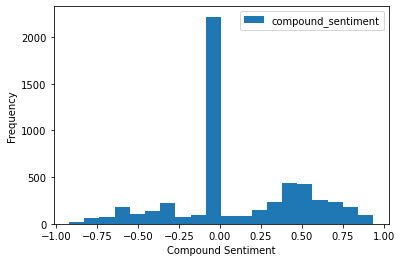

In [227]:
ax = df_tweets['compound_sentiment'].plot.hist(stacked=True,bins=20)
print(df_tweets['compound_sentiment'].mean())
ax.legend()
ax.set_xlabel("Compound Sentiment")

We can see most posts are neutral, and there are more 'positive' posts than 'negative' ones, which yields a positive average sentiment score. This is a good sign for puplic's acceptance of the vaccine.

Now let's take a look at the scores of different countries.

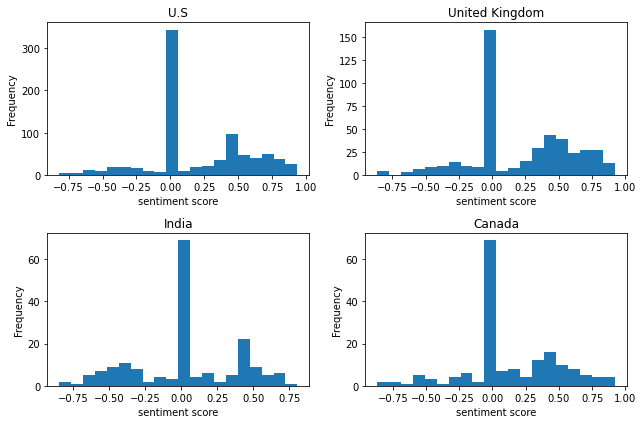

In [228]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))

# Divide the figure into a 1x2 grid, and give me the first section
# ax1 = fig.add_subplot(2, 2, (1,2))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
axs = [ax1,ax2,ax3,ax4]
contries = ['US','GB','IN','CA']
contries_full = ["U.S","United Kingdom","India","Canada"]

for i in range(len(axs)):
    df_tweets.query("user_country == '"+ contries[i] + "'" )['compound_sentiment'].plot.hist(stacked=True,bins=20, ax=axs[i])
    axs[i].set(xlabel='sentiment score', ylabel='Frequency', title=contries_full[i] )

plt.tight_layout()
plt.show()

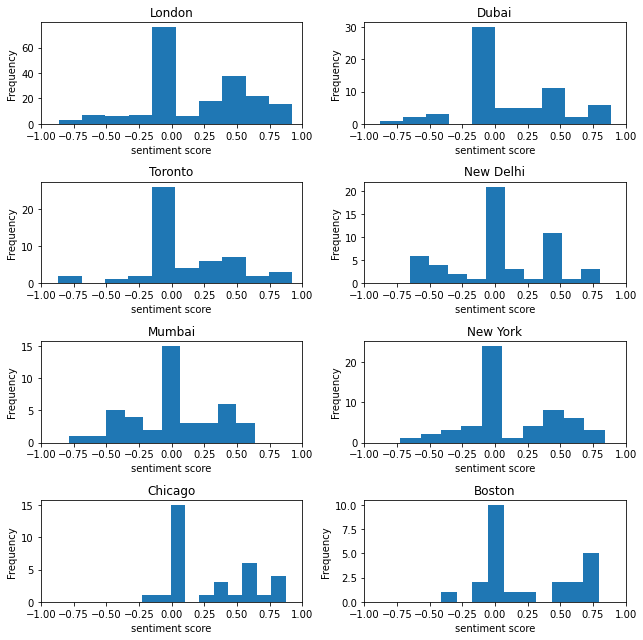

In [229]:
fig = plt.figure(figsize=(9,9))
# Divide the figure into a 4x2 grid, the first section is ax1 = fig.add_subplot(2, 2, (1,2))
axs = []
for i in range(1,9):
    axs.append(fig.add_subplot(4, 2, i))
cities = ['London','Dubai','Toronto','New Delhi','Mumbai','New York','Chicago','Boston']

for i in range(len(axs)):
    df_tweets.query("user_city == '"+ cities[i] + "'" )['compound_sentiment'].plot.hist(stacked=True,bins=10, ax=axs[i])
    axs[i].set(xlabel='sentiment score', ylabel='Frequency', title=cities[i] )
    axs[i].set_xlim(-1,1)

plt.tight_layout()
plt.show()

### Analysis

In [230]:
df_tweets.columns

Index(['user_name', 'user_location', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified', 'date', 'text',
       'source', 'retweets', 'favorites', 'is_retweet', 'user_city',
       'user_country', 'city_latitude', 'city_longitude', 'text_words',
       'neg_sentiment', 'pos_sentiment', 'neu_sentiment',
       'compound_sentiment'],
      dtype='object')

In [233]:
df_map = df_tweets[['user_city','city_latitude','city_longitude','compound_sentiment']].query("user_city != ''")
df_map

,user_city,city_latitude,city_longitude,compound_sentiment
0,Montrose,38.437539,-108.240386,0.4019
1,San Francisco,37.779026,-122.419906,-0.1027
3,Vancouver,49.260872,-123.113953,0.0000
5,Birmingham,52.479699,-1.902691,0.7003
9,Islamabad,33.693812,73.065151,0.0000
...,...,...,...,...
5358,Vancouver,49.260872,-123.113953,0.2500
5364,Paris,48.856697,2.351462,0.7351
5369,Ontario,50.000678,-86.000977,0.0000
5370,Hamburg,53.550341,10.000654,-0.2960


In [248]:
df_map = df_map.groupby(['user_city']).mean()
df_map

,compound_sentiment
user_city,
Abu Dhabi,0.132443
Abuja,0.000000
Accra,0.000000
Addis Ababa,-0.557400
Adelaide,-0.401900
...,...
Wollongong,0.272233
Wolverhampton,0.554950
Worcester,0.408100


In [238]:
df_map['user_city'].value_counts(sort=True).to_frame()

,user_city
London,199
Dubai,65
New York,56
Toronto,53
New Delhi,53
...,...
Tokyo,1
Sandy,1
Davenport,1
Parma,1
